---


## Common types of time series forecasting problems

- Forecast a single value of the time series. (use y historic values of y to predict y at one point in the future)
- Forecast a whole range of future values. (use historic values of y to predict y at many points in the future)
- Use other features to aid in your forecast. (predict many y in the future and use y and X)
- Forecast multiple time series simultaneously

## Approaching time series forecasting problems

## Before modeling
- Get the time period into *datetime* dtype format
- put it in the index
- sort the index

## Modeling considerations
- Make sure you are clear what you are predicting (one value, a range of values, one-step-ahead that updates every time period?)
- **Make sure you aren't leaking information from the future into your training data**
- Make null baseline models

## Quarter Scores

### Let's forecast one single value one time period into the future

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Prepare data

#### Read in the dataset, set the index as a datetime index, sort it, and take a look at it.

In [4]:
games = pd.read_csv('data/MasterGames_2000to2019.csv')
games.head()

,GameID,Week,Day,DateStamp,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,HQ1,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie
0,200009030min,1,Sun,2000-09-03,Bears,7,6,7,7,2000,Vikings,6,3,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears
1,200009030kan,1,Sun,2000-09-03,Colts,0,7,7,13,2000,Chiefs,0,7,7,0,9/3/2000,1:00PM,Indianapolis Colts,@,Kansas City Chiefs
2,200009030was,1,Sun,2000-09-03,Panthers,10,0,0,7,2000,Redskins,7,0,3,10,9/3/2000,1:01PM,Washington Redskins,NaN,Carolina Panthers
3,200009030atl,1,Sun,2000-09-03,49ers,7,7,7,7,2000,Falcons,6,16,14,0,9/3/2000,1:02PM,Atlanta Falcons,NaN,San Francisco 49ers
4,200009030pit,1,Sun,2000-09-03,Ravens,10,3,3,0,2000,Steelers,0,0,0,0,9/3/2000,1:02PM,Baltimore Ravens,@,Pittsburgh Steelers


In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5324 entries, 0 to 5323
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GameID       5324 non-null   object
 1   Week         5324 non-null   int64 
 2   Day          5324 non-null   object
 3   DateStamp    5324 non-null   object
 4   Vteam        5324 non-null   object
 5   VQ1          5324 non-null   int64 
 6   VQ2          5324 non-null   int64 
 7   VQ3          5324 non-null   int64 
 8   VQ4          5324 non-null   int64 
 9   Year         5324 non-null   int64 
 10  Hteam        5324 non-null   object
 11  HQ1          5324 non-null   int64 
 12  HQ2          5324 non-null   int64 
 13  HQ3          5324 non-null   int64 
 14  HQ4          5324 non-null   int64 
 15  Date         5324 non-null   object
 16  Time         5324 non-null   object
 17  Winner/tie   5324 non-null   object
 18  Unnamed: 18  2296 non-null   object
 19  Loser/tie    5324 non-null 

In [6]:
games.tail()

,Unnamed: 0,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,HQ1,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie
DateStamp,,,,,,,,,,,,,,,,,,,,
2020-01-12,5319,2019-DV-Vikings49ers,200,Sun,Vikings,7,3,0,0,2019,49ers,7,7,10,3,1/12/2020,3:05PM,Kansas City Chiefs,NaN,Houston Texans
2020-01-12,5320,2019-DV-TitansRavens,200,Sun,Titans,7,7,14,0,2019,Ravens,0,6,0,6,1/12/2020,6:40PM,Green Bay Packers,NaN,Seattle Seahawks
2020-01-19,5321,2019-CC-TitansChiefs,300,Sun,Titans,10,7,0,7,2019,Chiefs,7,14,0,14,1/19/2020,3:05PM,Kansas City Chiefs,NaN,Tennessee Titans
2020-01-19,5322,2019-CC-Packers49ers,300,Sun,Packers,0,0,7,13,2019,49ers,7,20,7,3,1/19/2020,6:40PM,San Francisco 49ers,NaN,Green Bay Packers
2020-02-02,5323,2019-SB-49ersChiefs,400,Sun,49ers,3,7,10,0,2019,Chiefs,7,3,0,21,2/2/2020,6:30PM,Kansas City Chiefs,N,San Francisco 49ers


In [6]:
games_Bears = games[(games.Vteam == 'Bears') | (games.Hteam == 'Bears')]


In [7]:
games_Bears_2000 = games_Bears[(games.Year == 2000)]

<ipython-input-7-9b9b4e143cb8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_Bears_2000 = games_Bears[(games.Year == 2000)]


In [8]:
games_Bears_2000

,GameID,Week,Day,DateStamp,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,HQ1,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie
0,200009030min,1,Sun,2000-09-03,Bears,7,6,7,7,2000,Vikings,6,3,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears
18,200009100tam,2,Sun,2000-09-10,Bears,0,0,0,0,2000,Buccaneers,0,20,14,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers
37,200009170chi,3,Sun,2000-09-17,Giants,7,0,7,0,2000,Bears,0,7,0,0,9/17/2000,3:16PM,New York Giants,@,Chicago Bears
46,200009240chi,4,Sun,2000-09-24,Lions,7,7,0,7,2000,Bears,0,0,14,0,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints
68,200010010gnb,5,Sun,2000-10-01,Bears,10,7,7,3,2000,Packers,0,3,7,14,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers
78,200010080chi,6,Sun,2000-10-08,Saints,0,17,7,7,2000,Bears,7,0,0,3,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears
98,200010150chi,7,Sun,2000-10-15,Vikings,0,14,7,7,2000,Bears,6,3,0,7,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears
108,200010220phi,8,Sun,2000-10-22,Bears,0,0,0,9,2000,Eagles,3,7,3,0,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears
130,200011050chi,10,Sun,2000-11-05,Colts,0,0,8,16,2000,Bears,10,10,7,0,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts
148,200011120buf,11,Sun,2000-11-12,Bears,0,3,0,0,2000,Bills,0,6,7,7,11/12/2000,1:02PM,Buffalo Bills,NaN,Chicago Bears


In [9]:
pd.to_datetime(games_Bears_2000['DateStamp'])

0     2000-09-03
18    2000-09-10
37    2000-09-17
46    2000-09-24
68    2000-10-01
78    2000-10-08
98    2000-10-15
108   2000-10-22
130   2000-11-05
148   2000-11-12
166   2000-11-19
180   2000-11-26
201   2000-12-03
204   2000-12-10
228   2000-12-17
237   2000-12-24
Name: DateStamp, dtype: datetime64[ns]

In [10]:
games_Bears_2000.set_index('DateStamp', inplace=True)

In [11]:
games_Bears_2000

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,HQ1,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie
DateStamp,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,6,3,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,0,20,14,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,0,7,0,0,9/17/2000,3:16PM,New York Giants,@,Chicago Bears
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,0,0,14,0,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,0,3,7,14,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,7,0,0,3,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,6,3,0,7,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,3,7,3,0,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,10,10,7,0,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts


In [12]:
X = games_Bears_2000[:-1]
y = games_Bears_2000.iloc[-1,]

In [7]:
games.columns

Index(['Unnamed: 0', 'GameID', 'Week', 'Day', 'Vteam', 'VQ1', 'VQ2', 'VQ3',
       'VQ4', 'Year', 'Hteam', 'HQ1', 'HQ2', 'HQ3', 'HQ4', 'Date', 'Time',
       'Winner/tie', 'Unnamed: 18', 'Loser/tie'],
      dtype='object')

#### Keep only quarter scores

In [14]:
games_Qscores = games[['VQ1', 'VQ2', 'VQ3','VQ4', 'HQ1', 'HQ2', 'HQ3', 'HQ4']]
games_Qscores

,VQ1,VQ2,VQ3,VQ4,HQ1,HQ2,HQ3,HQ4
0,7,6,7,7,6,3,7,14
1,0,7,7,13,0,7,7,0
2,10,0,0,7,7,0,3,10
3,7,7,7,7,6,16,14,0
4,10,3,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5319,7,3,0,0,7,7,10,3
5320,7,7,14,0,0,6,0,6
5321,10,7,0,7,7,14,0,14
5322,0,0,7,13,7,20,7,3


### Split the dataset into train and test sets.

Subset the data to train and test. **The test set must come after the training set.**

#### Let's make the two datasets manually

In [15]:
train = games_Qscores.loc[:'2015']
test = games_Qscores.loc['2015':'2018']

In [16]:
test


,VQ1,VQ2,VQ3,VQ4,HQ1,HQ2,HQ3,HQ4
2015,0,21,10,0,10,3,0,0
2016,3,3,7,7,7,3,7,0
2017,7,0,10,7,16,3,0,0
2018,0,6,0,0,7,7,14,7


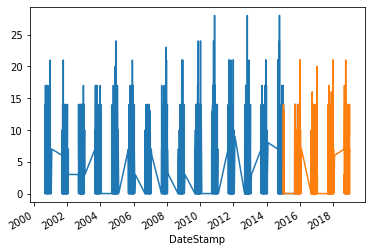

In [12]:
# just for fun - plot VQ1s
train['VQ1'].plot()
test['VQ1'].plot();

Plot the two DataFrames

## Model 1: Naive Forecast

Take the last time period's sales and estimate the same value for all future time periods. This method is a **naive forecast**.

$${\Large \hat y_{t+1} = y_t}$$

Make a predictions DataFrame and set the predicted values equal to the last value in the `Sales` df.

In [17]:
train.tail(1)

,VQ1,VQ2,VQ3,VQ4,HQ1,HQ2,HQ3,HQ4
2015,0,21,10,0,10,3,0,0


#### Save our results in a *df_predictions* DataFrame.

In [18]:
df_predictions = X.copy(deep=True)

In [19]:
df_predictions.shape

(15, 19)

#### Take the last training dataset value and make that the guess for all future time periods.

In [20]:
df_predictions['lastVQ1'] = train['VQ1'].iloc[-1]

In [21]:
df_predictions

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,HQ1,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1
DateStamp,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,6,3,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,0,20,14,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,0,7,0,0,9/17/2000,3:16PM,New York Giants,@,Chicago Bears,0
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,0,0,14,0,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints,0
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,0,3,7,14,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers,0
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,7,0,0,3,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears,0
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,6,3,0,7,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears,0
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,3,7,3,0,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears,0
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,10,10,7,0,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts,0


#### Plot the historic data, the actual "future" data, and the predicted "future" data.

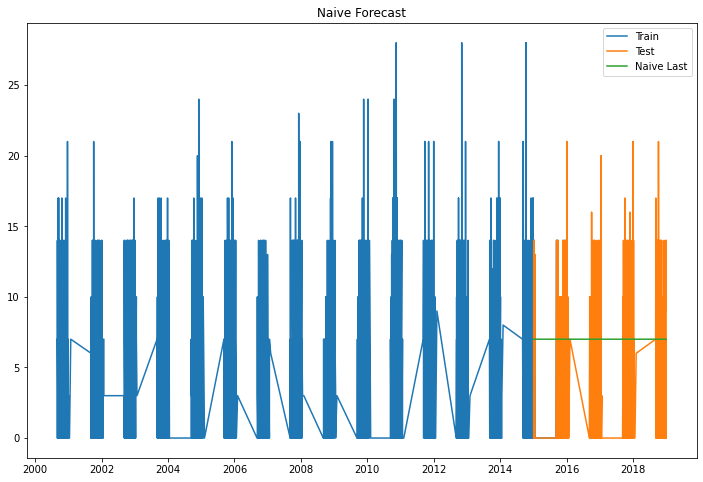

In [22]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['VQ1'], label='Train')
plt.plot(test.index, test['VQ1'], label='Test')
plt.plot(df_predictions.index, df_predictions['lastVQ1'], label="Naive Last")

plt.legend(loc='best')
plt.title("Naive Forecast");

#### Score our model

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(df_predictions['VQ1'], df_predictions['lastVQ1'], squared=False)

5.28087497006303

#### That's the most basic baseline.


---
## Model 2: Simple average of the training data
Another baseline model. Maybe slightly better when the data don't have much of a trend.

In [25]:
df_predictions['simple_mean'] = train['VQ1'].mean()

#### Plot

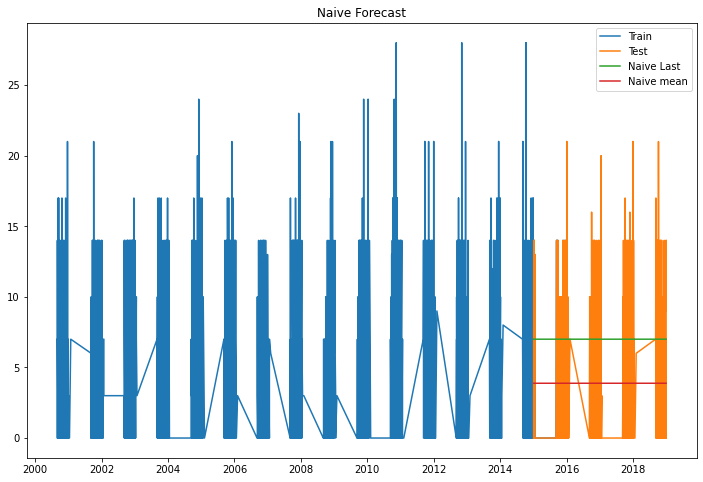

In [28]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['VQ1'], label='Train')
plt.plot(test.index, test['VQ1'], label='Test')
plt.plot(df_predictions.index, df_predictions['lastVQ1'], label="Naive Last")
plt.plot(df_predictions.index, df_predictions['simple_mean'], label="Naive mean")

plt.legend(loc='best')
plt.title("Naive Forecast");

#### Evaluate

In [29]:
mean_squared_error(df_predictions['VQ1'], df_predictions['simple_mean'], squared=False)

4.230499436574731

## Model 3: Seasonality


In [23]:
df_predictions['seasonal'] = X['VQ1'].shift(1)
#doesn't work

In [24]:
df_predictions

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,...,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1,seasonal
DateStamp,,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,...,3,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0,NaN
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,...,20,14,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0,7.0
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,...,7,0,0,9/17/2000,3:16PM,New York Giants,@,Chicago Bears,0,0.0
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,...,0,14,0,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints,0,7.0
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,...,3,7,14,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers,0,7.0
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,...,0,0,3,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears,0,10.0
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,...,3,0,7,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears,0,0.0
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,...,7,3,0,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears,0,0.0
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,...,10,7,0,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts,0,0.0


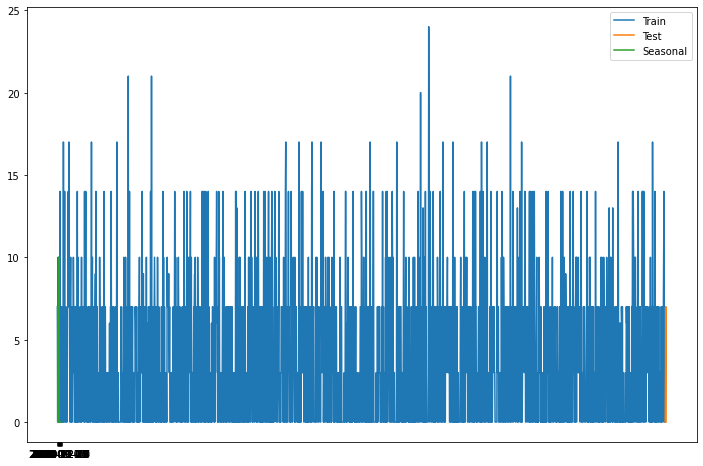

In [27]:
plt.figure(figsize=(12,8))
plt.plot(train['VQ1'], label='Train')
plt.plot(test['VQ1'], label='Test')
plt.plot(df_predictions['seasonal'], label='Seasonal')
#plt.plot(df_predictions['last'], label='Naive Forecast')
#plt.plot(df_predictions['simple_mean'], label='Historical Mean')
plt.legend(loc='best');

In [40]:
round(mean_squared_error(df_predictions['sales'], df_predictions['seasonal'], squared=False), 2)

97900.47

---
## Model 4: Simple Exponential Smoothing

Smoothing just means using a moving average. Read more on moving averages from Hyndman [here](https://robjhyndman.com/papers/movingaverage.pdf).

Simple exponential smoothing uses weighted averages where the weights decrease exponentially for older data points. 

$${\Large\hat y_{t+1} = \alpha y_t + \alpha (1-\alpha)y_{t-1} + \alpha(1-\alpha)^2 y_{t-2} + ...}$$

The one-step-ahead forecast for time `t+1` is a weighted average of all of the observations in the series (`y1,…,yt`). The rate at which the weights decrease is controlled by the parameter, `α` (which is between 0 and 1).

**Older values matter less.**

If alpha =.5: 

- What is the weight of the most recent observation (t)? 
- What is the weight of (t-1)?
- What is the weight of (t-2)?

#### Let's use statsmodels for more advanced time series models to make life easier.

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [29]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [30]:
ses = SimpleExpSmoothing(train['VQ1']).fit(smoothing_level=.5)

C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


#### Summary info

In [31]:
ses.summary()

Dep. Variable:,VQ1,No. Observations:,2016
Model:,SimpleExpSmoothing,SSE,50764.419
Optimized:,True,AIC,6507.778
Trend:,None,BIC,6518.996
Seasonal:,None,AICC,6507.798
Seasonal Periods:,None,Date:,"Tue, 08 Jun 2021"
Box-Cox:,False,Time:,13:14:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,5.5148102,l.0,True


#### The best thing about statsmodels is the summary. 

Here you get lots of info: AIC, BIC, AICC, etc. 🎉

The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) above are measures of how well the model fits. Lower is better. They consider the complexity of the model - like adjusted R2.

#### Forecast with `.forecast`

Here you can just pass an integer for the number of forecasts. 

In [32]:
ses_forecast = ses.forecast(len(test))
ses_forecast

2016    0.683331
2017    0.683331
2018    0.683331
2019    0.683331
dtype: float64

In [33]:
df_predictions

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,...,HQ2,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1,seasonal
DateStamp,,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,...,3,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0,NaN
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,...,20,14,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0,7.0
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,...,7,0,0,9/17/2000,3:16PM,New York Giants,@,Chicago Bears,0,0.0
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,...,0,14,0,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints,0,7.0
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,...,3,7,14,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers,0,7.0
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,...,0,0,3,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears,0,10.0
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,...,3,0,7,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears,0,0.0
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,...,7,3,0,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears,0,0.0
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,...,10,7,0,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts,0,0.0


In [34]:
df_predictions['ses'] = .0683

In [35]:
df_predictions.head(2)

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,...,HQ3,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1,seasonal,ses
DateStamp,,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,...,7,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0,NaN,0.0683
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,...,14,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0,7.0,0.0683


#### Plot

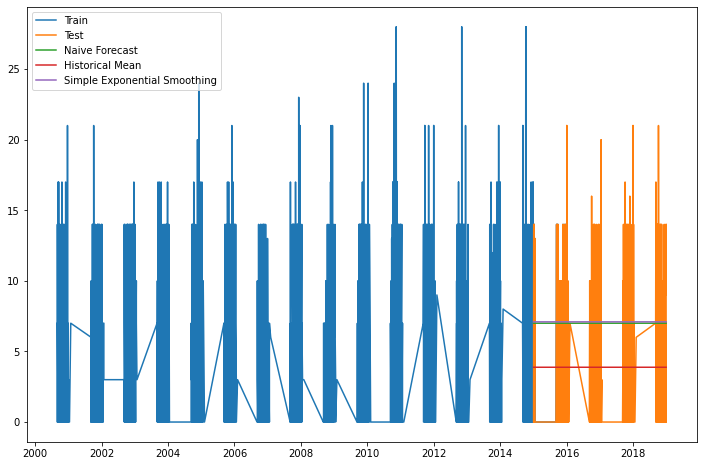

In [49]:
plt.figure(figsize=(12,8))
plt.plot(train['VQ1'], label='Train')
plt.plot(test['VQ1'], label='Test')
plt.plot(df_predictions['lastVQ1'], label='Naive Forecast')
plt.plot(df_predictions['simple_mean'], label='Historical Mean')

plt.plot(df_predictions['ses'], label='Simple Exponential Smoothing')

plt.legend(loc='best');

You can play with the smoothing level, but SES forecasts the same number every time, so this isn't going to be a winner.

---
## Model 5: Holt-Winters' (additive and multiplicative versions)

- It's part of the exponential smoothing family of algorithms. 
- It's also called *Triple Exponential Smoothing*

Holt-Winters' can handle treand and seasonality. It weights recent values more than old ones. This is a very strong classical time series model.

#### Params to choose: 
- number of seasonal_periods
- seasonal period effects additive or multiplicative
- additive or multiplicative trend
- dampening

In [36]:
train['VQ1.001'] = train['VQ1'] + .001
train

<ipython-input-36-f1dc1e6274e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['VQ1.001'] = train['VQ1'] + .001


,VQ1,VQ2,VQ3,VQ4,HQ1,HQ2,HQ3,HQ4,VQ1.001
0,7,6,7,7,6,3,7,14,7.001
1,0,7,7,13,0,7,7,0,0.001
2,10,0,0,7,7,0,3,10,10.001
3,7,7,7,7,6,16,14,0,7.001
4,10,3,3,0,0,0,0,0,10.001
...,...,...,...,...,...,...,...,...,...
2011,14,21,7,14,7,0,3,0,14.001
2012,0,10,7,3,14,6,7,7,0.001
2013,0,17,14,6,6,3,3,14,0.001
2014,0,3,0,0,7,14,3,10,0.001


In [38]:
hww = ExponentialSmoothing(train['VQ1.001'], seasonal_periods=2,
trend = 'add', seasonal = 'add'
).fit()

C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [39]:
hww.summary()

Dep. Variable:,VQ1.001,No. Observations:,2016
Model:,ExponentialSmoothing,SSE,37758.422
Optimized:,True,AIC,5919.068
Trend:,Additive,BIC,5952.721
Seasonal:,Additive,AICC,5919.140
Seasonal Periods:,2,Date:,"Tue, 08 Jun 2021"
Box-Cox:,False,Time:,13:17:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,5.471e-05,alpha,True
smoothing_trend,2.0904e-06,beta,True


In [40]:
df_predictions['hw'] = hww.forecast(len(test))
df_predictions

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,...,HQ4,Date,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1,seasonal,ses,hw
DateStamp,,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,...,14,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0,NaN,0.0683,NaN
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,...,7,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0,7.0,0.0683,NaN
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,...,0,9/17/2000,3:16PM,New York Giants,@,Chicago Bears,0,0.0,0.0683,NaN
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,...,0,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints,0,7.0,0.0683,NaN
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,...,14,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers,0,7.0,0.0683,NaN
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,...,3,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears,0,10.0,0.0683,NaN
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,...,7,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears,0,0.0,0.0683,NaN
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,...,0,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears,0,0.0,0.0683,NaN
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,...,0,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts,0,0.0,0.0683,NaN


In [41]:
hw1 = ExponentialSmoothing(train['VQ1.001'], seasonal_periods=2,
trend = 'mul', seasonal = 'add'
).fit()

C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [42]:
hw1.summary()

Dep. Variable:,VQ1.001,No. Observations:,2016
Model:,ExponentialSmoothing,SSE,38753.050
Optimized:,True,AIC,5971.486
Trend:,Multiplicative,BIC,6005.139
Seasonal:,Additive,AICC,5971.557
Seasonal Periods:,2,Date:,"Tue, 08 Jun 2021"
Box-Cox:,False,Time:,13:19:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0001731,alpha,True
smoothing_trend,4.3836e-05,beta,True


In [43]:
df_predictions['hw1'] = hw1.forecast(len(test))
df_predictions

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,...,Date,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1,seasonal,ses,hw,hw1
DateStamp,,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,...,9/3/2000,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0,NaN,0.0683,NaN,NaN
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,...,9/10/2000,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0,7.0,0.0683,NaN,NaN
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,...,9/17/2000,3:16PM,New York Giants,@,Chicago Bears,0,0.0,0.0683,NaN,NaN
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,...,9/24/2000,1:02PM,Philadelphia Eagles,@,New Orleans Saints,0,7.0,0.0683,NaN,NaN
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,...,10/1/2000,4:15PM,Chicago Bears,@,Green Bay Packers,0,7.0,0.0683,NaN,NaN
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,...,10/8/2000,1:03PM,New Orleans Saints,@,Chicago Bears,0,10.0,0.0683,NaN,NaN
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,...,10/15/2000,8:35PM,Minnesota Vikings,@,Chicago Bears,0,0.0,0.0683,NaN,NaN
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,...,10/22/2000,1:03PM,Philadelphia Eagles,NaN,Chicago Bears,0,0.0,0.0683,NaN,NaN
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,...,11/5/2000,1:02PM,Chicago Bears,NaN,Indianapolis Colts,0,0.0,0.0683,NaN,NaN


In [44]:
hw2 = ExponentialSmoothing(train['VQ1.001'], seasonal_periods=25,
trend = 'mul', seasonal = 'mul'
).fit()

C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\chris\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [45]:
hw2.summary()

Dep. Variable:,VQ1.001,No. Observations:,2016
Model:,ExponentialSmoothing,SSE,77862791.648
Optimized:,True,AIC,21350.162
Trend:,Multiplicative,BIC,21512.819
Seasonal:,Multiplicative,AICC,21351.162
Seasonal Periods:,25,Date:,"Tue, 08 Jun 2021"
Box-Cox:,False,Time:,13:20:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [48]:
df_predictions['hw2'] = hw2.forecast(len(test))
df_predictions

,GameID,Week,Day,Vteam,VQ1,VQ2,VQ3,VQ4,Year,Hteam,...,Time,Winner/tie,Unnamed: 18,Loser/tie,lastVQ1,seasonal,ses,hw,hw1,hw2
DateStamp,,,,,,,,,,,,,,,,,,,,,
2000-09-03,200009030min,1,Sun,Bears,7,6,7,7,2000,Vikings,...,1:00PM,Minnesota Vikings,NaN,Chicago Bears,0,NaN,0.0683,NaN,NaN,NaN
2000-09-10,200009100tam,2,Sun,Bears,0,0,0,0,2000,Buccaneers,...,1:01PM,Buffalo Bills,NaN,Green Bay Packers,0,7.0,0.0683,NaN,NaN,NaN
2000-09-17,200009170chi,3,Sun,Giants,7,0,7,0,2000,Bears,...,3:16PM,New York Giants,@,Chicago Bears,0,0.0,0.0683,NaN,NaN,NaN
2000-09-24,200009240chi,4,Sun,Lions,7,7,0,7,2000,Bears,...,1:02PM,Philadelphia Eagles,@,New Orleans Saints,0,7.0,0.0683,NaN,NaN,NaN
2000-10-01,200010010gnb,5,Sun,Bears,10,7,7,3,2000,Packers,...,4:15PM,Chicago Bears,@,Green Bay Packers,0,7.0,0.0683,NaN,NaN,NaN
2000-10-08,200010080chi,6,Sun,Saints,0,17,7,7,2000,Bears,...,1:03PM,New Orleans Saints,@,Chicago Bears,0,10.0,0.0683,NaN,NaN,NaN
2000-10-15,200010150chi,7,Sun,Vikings,0,14,7,7,2000,Bears,...,8:35PM,Minnesota Vikings,@,Chicago Bears,0,0.0,0.0683,NaN,NaN,NaN
2000-10-22,200010220phi,8,Sun,Bears,0,0,0,9,2000,Eagles,...,1:03PM,Philadelphia Eagles,NaN,Chicago Bears,0,0.0,0.0683,NaN,NaN,NaN
2000-11-05,200011050chi,10,Sun,Colts,0,0,8,16,2000,Bears,...,1:02PM,Chicago Bears,NaN,Indianapolis Colts,0,0.0,0.0683,NaN,NaN,NaN


#### Plot

KeyError: 'hww'

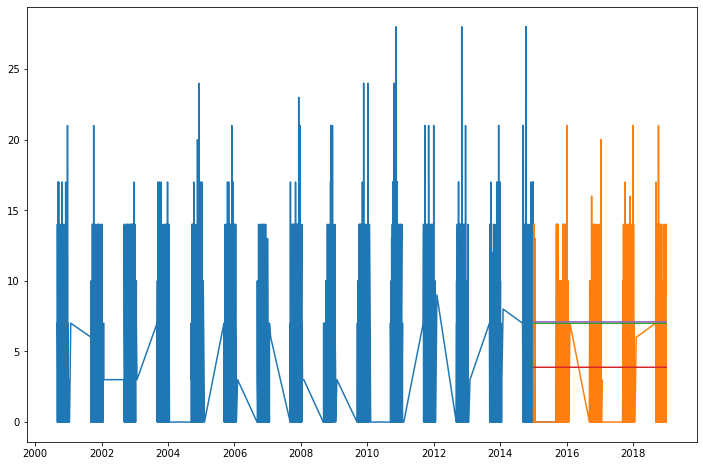

In [64]:
plt.figure(figsize=(12,8))
plt.plot(train['VQ1'], label='Train')
plt.plot(test['VQ1'], label='Test')
plt.plot(df_predictions['lastVQ1'], label='Naive Forecast')
plt.plot(df_predictions['simple_mean'], label='Historical Mean')

plt.plot(df_predictions['ses'], label='Simple Exponential Smoothing')
plt.plot(df_predictions['hww'], label="Holt-Winters'")
plt.legend(loc='best');

### Let's clean that up

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(df_predictions['hw'], label="Holt-Winters'")
plt.legend(loc='best');

Holy cow! 🐄

#### Evaluate

In [58]:
mean_squared_error(df_predictions['sales'], df_predictions['hw'], squared=False), 2)

81491.11

## Why did Holt-Winters' not work well?

A time series dataset can be decomposed into its trend, seasonality, and residual components.

Let's break down the components using statsmodels `seasonal_decompose` function. 

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(games_Qscores, period=2).plot();

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

---
## ARIMA

In [69]:
from pmdarima.utils import tsdisplay
from pmdarima.arima import auto_arima
model = auto_arima(train['VQ1'], m = 25, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[25] intercept   : AIC=inf, Time=34.50 sec
 ARIMA(0,1,0)(0,0,0)[25] intercept   : AIC=27486.079, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[25] intercept   : AIC=26359.608, Time=1.88 sec
 ARIMA(0,1,1)(0,0,1)[25] intercept   : AIC=inf, Time=17.54 sec
 ARIMA(0,1,0)(0,0,0)[25]             : AIC=27484.079, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[25] intercept   : AIC=26359.143, Time=0.16 sec
 ARIMA(1,1,0)(0,0,1)[25] intercept   : AIC=26359.601, Time=2.16 sec
 ARIMA(1,1,0)(1,0,1)[25] intercept   : AIC=26361.616, Time=2.58 sec
 ARIMA(2,1,0)(0,0,0)[25] intercept   : AIC=25912.793, Time=0.32 sec
 ARIMA(2,1,0)(1,0,0)[25] intercept   : AIC=25912.623, Time=2.67 sec
 ARIMA(2,1,0)(2,0,0)[25] intercept   : AIC=25914.606, Time=15.52 sec
 ARIMA(2,1,0)(1,0,1)[25] intercept   : AIC=25914.611, Time=9.50 sec
 ARIMA(2,1,0)(0,0,1)[25] intercept   : AIC=25912.616, Time=2.65 sec
 ARIMA(2,1,0)(0,0,2)[25] intercept   : AIC=25914.609, Time=12.57 sec
 ARIMA(2,1,0)

MemoryError: Unable to allocate 1.59 MiB for an array with shape (4178, 50) and data type float64

#### Pick a different store. Does the model perform similarly? 

In [ ]:
preds = model.predict(test.shape[0])

Note: Pandas has exponential weighted functions, rolling functions, and expanding window transformations. Great for looking at historical data, but statsmodels is far better for making a forecasts.



## Check out the great free ebook:
[Forecasting: Principles and Practice by
Rob J Hyndman & George Athanasopoulos](https://otexts.com/fpp3/) to learn more about time series. Hyndman is also behind a lot of the time series code and strategy in an R package that Python packages use.

Jason Brownlee also has a lot of great information and Python code on time series forecasting at [Machine Learning Mastery](https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/).

## Summary
- **Always sort your time series data by date**
- **Make sure you aren't leaking information from the future into your training data**
- Make baseline models first
- Consider the tradeoffs between complexity and performance when choosing which model to use
- Holt-Winters' Exponential Smoothing is really powerful and doesn't have too many parameters to choose.

### Check for understanding

- How can you keep from leaking test data into your training data?
- Why does Holt-Winters' often work well on sales data?
